# House Market Study Notebook

## Objectives 

* Answer business requirement 1:
     * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

* Understand which variables are likely to influence house prices.

* Provide insights that can support feature engineering and model training.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App.

* Detect missing values and outliers that could affect modeling.

* Identify top predictive features for our regression model.

* Formulate and justify initial project hypotheses for validation later.

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Sales-House-Price-Estimate/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Sales-House-Price-Estimate'

---

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
5,796,566.0,1.0,No,732,GLQ,64,NaN,480,Unf,...,85.0,0.0,30,5,5,796,NaN,1993,1995,143000
6,1694,0.0,3.0,Av,1369,GLQ,317,NaN,636,RFn,...,75.0,186.0,57,5,8,1686,NaN,2004,2005,307000
7,1107,983.0,3.0,Mn,859,ALQ,216,NaN,484,NaN,...,NaN,240.0,204,6,7,1107,NaN,1973,1973,200000
8,1022,752.0,2.0,No,0,Unf,952,NaN,468,Unf,...,51.0,0.0,0,5,7,952,NaN,1931,1950,129900
9,1077,0.0,2.0,No,851,GLQ,140,NaN,205,RFn,...,50.0,0.0,4,6,5,991,NaN,1939,1950,118000


---

# Data Exploration

We can use the ydata_profiling library to examine the dataset, which will provide insights into the characteristics of each feature and the relationships they share with one another. This will help us understand how it affects the business requirement of predicting the correlation between house values and sale prices.

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Handle missing data

In [ ]:
df.info() # General info
df.isnull().sum() # missing value summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure       38
BsmtFinSF1          0
BsmtFinType1      145
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      235
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

We compute descriptive statistics to understand the distribution of numeric features. This helps detect extreme values (potential outliers), data ranges and scales, mean vs median differences (skewness).

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1374.0,348.524017,438.865586,0.0,0.00,0.0,728.00,2065.0
BedroomAbvGr,1361.0,2.869214,0.820115,0.0,2.00,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
EnclosedPorch,136.0,25.330882,66.684115,0.0,0.00,0.0,0.00,286.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0


### Visualise the Target Variable

```SalePrice``` is our Target Variable and we analyze its distribution to check:
- Skewness
- Outliers
- If log transformation may be needed for modeling

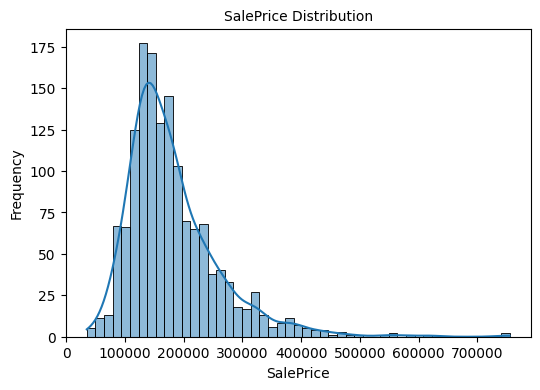

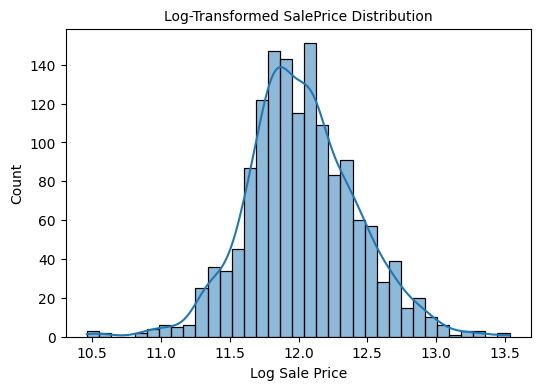

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], kde=True);
plt.title('SalePrice Distribution', fontsize=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Log-transformed distribution
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df['SalePrice']), kde=True);
plt.title('Log-Transformed SalePrice Distribution', fontsize=10)
plt.xlabel('Log Sale Price')
plt.show()

---


## Correlation Study

* As seen, we have 4 categorical variables ```BsmtExposure```, ```BsmtFinType1```, ```GarageFinish```, ```KitchenQual```.
  
* We can also notice that we have quite a lot of missing data. Also, ```EnclosedPorch``` and ```WoodDeckSF``` show a high number of missing entries, indicating they may be sparsely used or non-essential for all records. 
  
* We will process these variables in our Data Cleaning notebook.

* For now, we focus on numeric variables to find linear relationships with our Target Variable.

We now compute Pearson correlation and display correlations with a heatmap.

Pearson Numeric Variables Correlations with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64


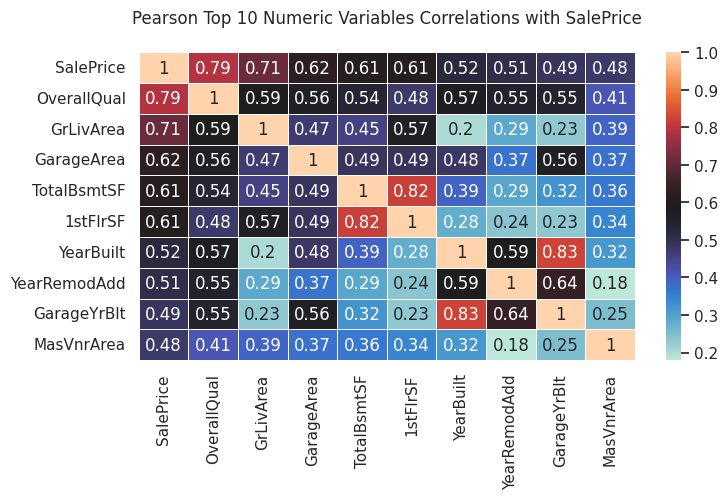

In [ ]:
# Compute correlations with SalePrice
corr_pearson = df.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False).head(10)
print("Pearson Numeric Variables Correlations with SalePrice:\n",corr_pearson)

# Heatmap to display the correlations
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))
sns.heatmap(df[corr_pearson.index].corr(), annot=True, linewidths=0.5, cmap='icefire')
plt.title('Pearson Top 10 Numeric Variables Correlations with SalePrice\n', fontsize=12)
plt.show()

In [ ]:
top_n = 7
# Sort correlations by ascending strength (smallest first)
corr_pearson_sorted = corr_pearson.sort_values(ascending=False)
# Select the top_n variable names in order
vars_to_study= corr_pearson_sorted.index[:top_n].to_list()
vars_to_study

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt']

In [ ]:
df_eda = df.filter(vars_to_study)
df_eda.head(10)

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt
0,208500,7,1710,548,856,856,2003
1,181500,6,1262,460,1262,1262,1976
2,223500,7,1786,608,920,920,2001
3,140000,7,1717,642,756,961,1915
4,250000,8,2198,836,1145,1145,2000
5,143000,5,1362,480,796,796,1993
6,307000,8,1694,636,1686,1694,2004
7,200000,7,2090,484,1107,1107,1973
8,129900,7,1774,468,952,1022,1931
9,118000,5,1077,205,991,1077,1939


Now, we will visualy inspect the relationship between top 6 numerical correlated variables and ```SalePrice``` to detect trends and spot oultiers that may affect modeling.

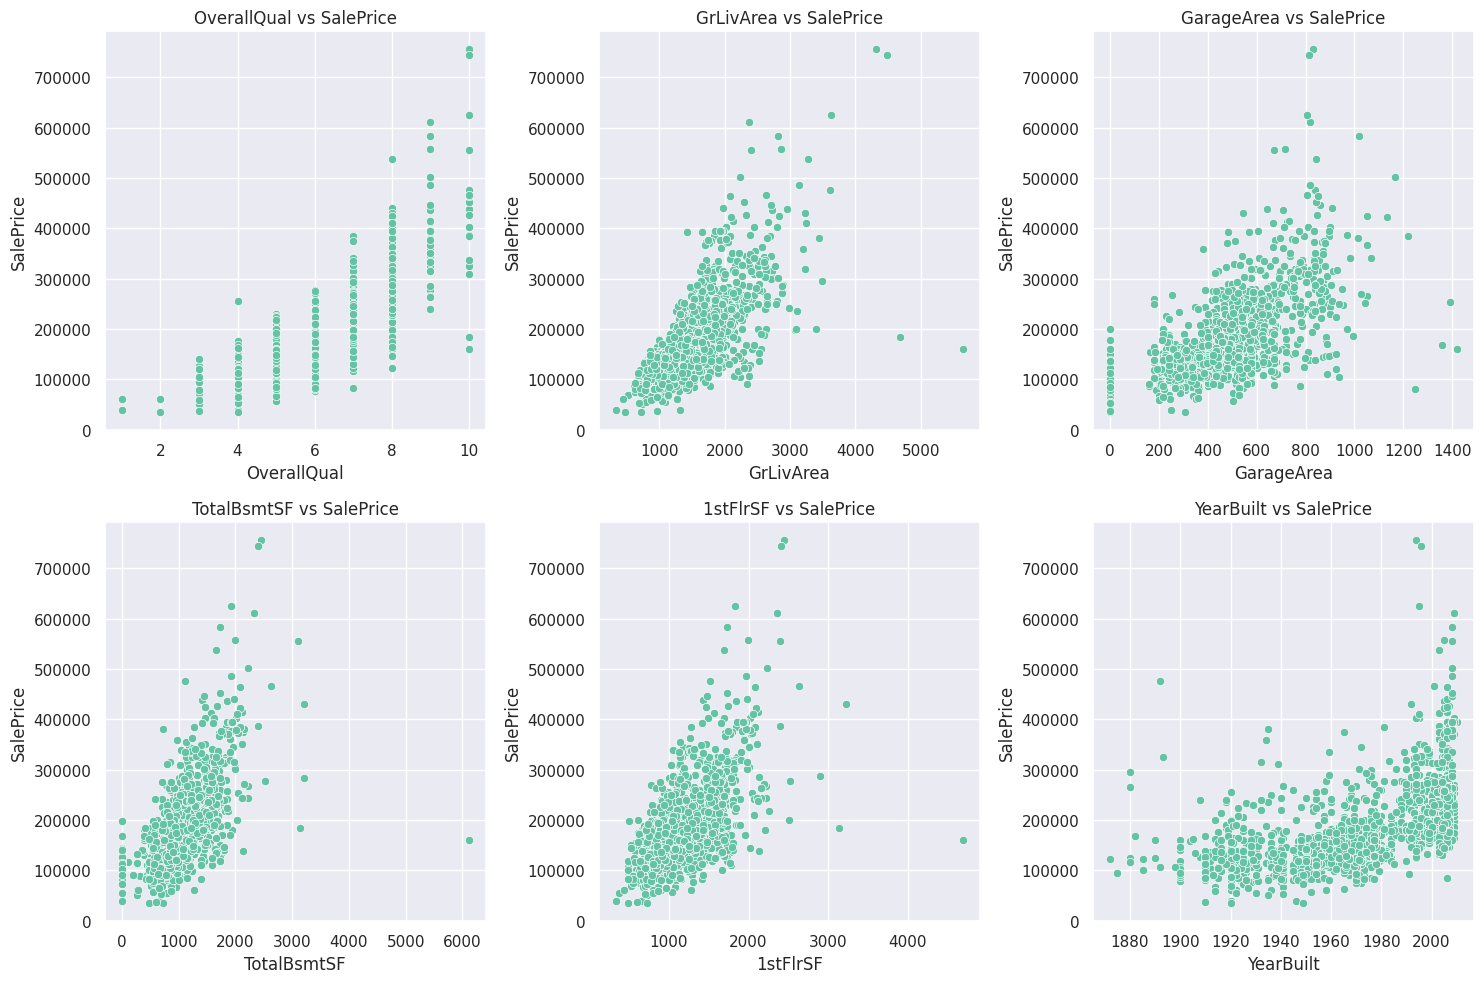

In [ ]:
# Top 6 numerical variables to be inspected
top_n_vars = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt']

sns.set_theme(palette="Set2")
# ScatterPlots for Top Variables vs SalePrice
plt.figure(figsize=(15,10))
for i, var in enumerate(top_n_vars, 1):
    plt.subplot(2,3,i)
    
    # Drop rows with NaN in this variable or SalePrice
    plot_df = df[[var, 'SalePrice']].dropna()
    
    sns.scatterplot(x=plot_df[var], y=plot_df['SalePrice'])
    plt.title(f'{var} vs SalePrice')

plt.tight_layout()
plt.show()

Further, we analyze the correlation of the categorical variables with ```SalePrice```.

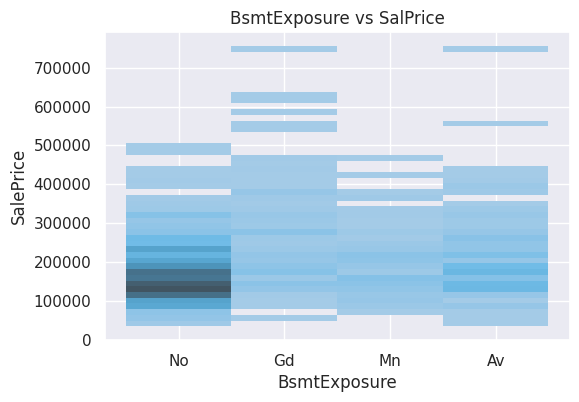

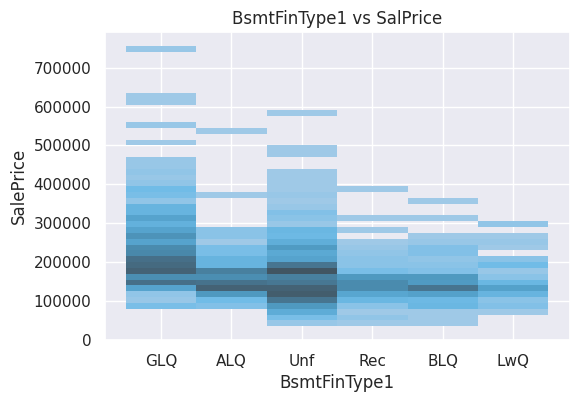

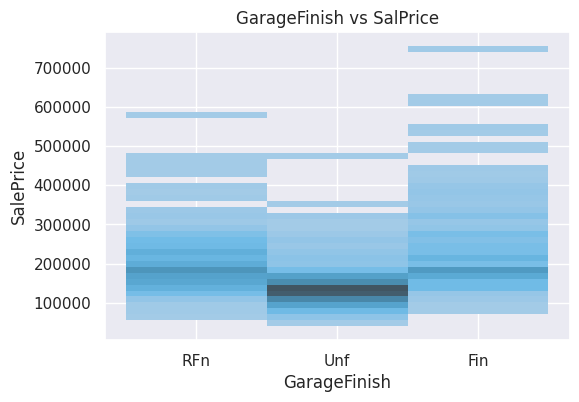

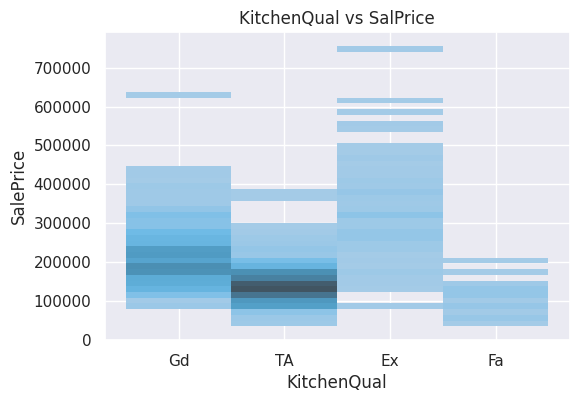

In [ ]:
# Categorical variables
cat_vars = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

# Loop to visualise histplots of cat_vars vs SalePrice
sns.set_theme(palette="icefire")
for var in cat_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=var, y='SalePrice')
    plt.title(f'{var} vs SalPrice')
    plt.show()

## Conclusions and Next Steps

After inspecting and visualising variables with the Target Variable we can come up with the following hypotheses:

* Houses with higher overall material and finish quality ```OverallQual``` sell for higher prices.

* Houses with larger above-ground living area ```GrLivArea``` have higher sale prices.

* Houses with extra spaces get to a higher sale price, and here we can include ```GarageArea```, ```TotalBsmtSF```, ```BsmtExposure```, ```GarageFinish```.

* Houses with a good kitchen quality ```KitchenQual``` have a good impact on the sale price.

Next steps: 

* Validate hypotheses.
  
* Clean data, ready for feature engineering and model.